<a href="https://colab.research.google.com/github/jhlee508/Dacon/blob/master/%EC%9B%94%EA%B0%84%20%EB%8D%B0%EC%9D%B4%EC%BD%98%2011/Dacon11_Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# working directory 바꾸기
import os
os.chdir('/content/drive/MyDrive/dacon_11')

In [ ]:
train = pd.read_csv('train_features.csv')
train_label = pd.read_csv('train_labels.csv')
test = pd.read_csv('test_features.csv')
submission = pd.read_csv('sample_submission.csv')

## 2. 데이터 탐색

In [ ]:
train.shape, train_label.shape, test.shape, submission.shape

((1875000, 8), (3125, 3), (469200, 8), (782, 62))

In [ ]:
train.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [ ]:
train[['id', 'time']].groupby('id').count()

,time
id,
0,600
1,600
2,600
3,600
4,600
...,...
3120,600
3121,600
3122,600


In [ ]:
train[['id', 'time']].groupby('id').count()['time'].unique()

array([600])

In [ ]:
train['id'].count()

1875000

In [ ]:
train_label

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [ ]:
i = 600
train.iloc[i,:]['id']

1.0

In [ ]:
train_label.iloc[:,1]

0       37
1       26
2        3
3       26
4       26
        ..
3120    26
3121    26
3122    15
3123    26
3124     2
Name: label, Length: 3125, dtype: int64

In [ ]:
c = 0
for i in range(3125):
    if train_label.iloc[i,:]['label'] == 26:
        continue
    c+=1
print(c)

1607


In [ ]:
train_label.isnull().sum()

id            0
label         0
label_desc    0
dtype: int64

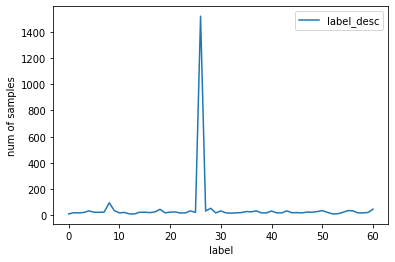

In [ ]:
train_label[['label_desc', 'label']].groupby(['label'], as_index=True).count().plot()
plt.ylabel("num of samples")
plt.show()

In [ ]:
train_label[train_label['label'] == 26]

,id,label,label_desc
1,1,26,Non-Exercise
3,3,26,Non-Exercise
4,4,26,Non-Exercise
5,5,26,Non-Exercise
6,6,26,Non-Exercise
...,...,...,...
3114,3114,26,Non-Exercise
3116,3116,26,Non-Exercise
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise


In [ ]:
train_label[['label_desc', 'label']].groupby(['label'], as_index=True).count().head(60)

,label_desc
label,
0,12
1,21
2,20
3,23
4,35
5,25
6,24
7,26
8,97


In [ ]:
test.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912


In [ ]:
test[['id', 'time']].groupby('id').count()['time'].unique()

array([600])

In [ ]:
submission.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train[['time', 'acc_x', 'acc_y', 'acc_z']]

,time,acc_x,acc_y,acc_z
0,0,1.206087,-0.179371,-0.148447
1,1,1.287696,-0.198974,-0.182444
2,2,1.304609,-0.195114,-0.253382
3,3,1.293095,-0.230366,-0.215210
4,4,1.300887,-0.187757,-0.222523
...,...,...,...,...
1874995,595,-0.712530,-0.658357,0.293707
1874996,596,-0.683037,-0.658466,0.329223
1874997,597,-0.664730,-0.666625,0.364114
1874998,598,-0.630534,-0.682565,0.373696


In [ ]:
def plot_acc_id(df, id_num):
    return df.query('id == @id_num')[['time', 'acc_x', 'acc_y', 'acc_z']].plot(x = 'time')

def plot_gy_id(df, id_num):
    return df.query('id == @id_num')[['time', 'gy_x', 'gy_y', 'gy_z']].plot(x = 'time')

(-1.5, 1.5)

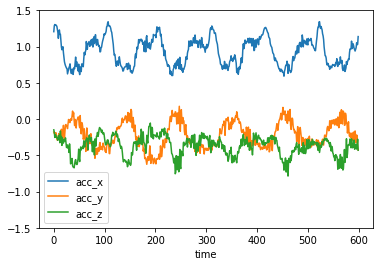

In [ ]:
plot_acc_id(train, 0)
plt.ylim((-1.5, 1.5))

- 운동 reps에 따른 주기가 관측됨

(-1.5, 1.5)

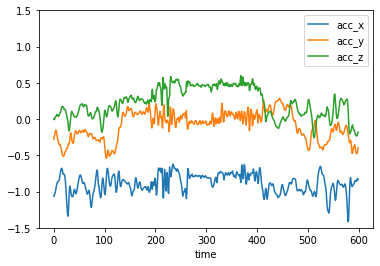

In [ ]:
plot_acc_id(train, 3)
plt.ylim((-1.5, 1.5))

- 쉴 때는 움직임이 dynamic 하지 않음
- 운동과 쉴 때 측정된 값 높낮이가 다를 것이며, 운동 끼리도 높낮이가 다를 것으로 추정

## 3. 데이터 전처리

In [ ]:
features = ['id', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z']

X_train = train[features]
X_test = test[features]

In [ ]:
X_train

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...
1874995,3124,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [ ]:
X_test

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912
...,...,...,...,...,...,...,...
469195,3906,0.104191,-0.784979,0.639513,-10.475346,14.095361,-190.358982
469196,3906,0.103297,-0.758954,0.615687,-25.360272,-8.523018,-180.393291
469197,3906,0.128294,-0.749389,0.586184,-27.917723,-23.186245,-162.624160
469198,3906,0.104130,-0.692731,0.573397,-27.847980,-30.407555,-138.761676


## Time Series Data Augmentation

### Jittering

In [ ]:
def DA_Jitter(X, sigma=0.05):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X + myNoise

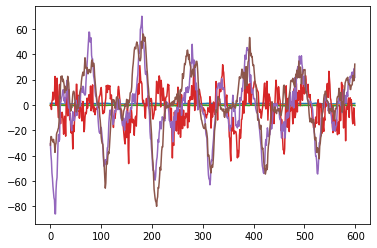

In [ ]:
temp = train.iloc[:600, 2:8].to_numpy()
plt.plot(temp)
plt.show()

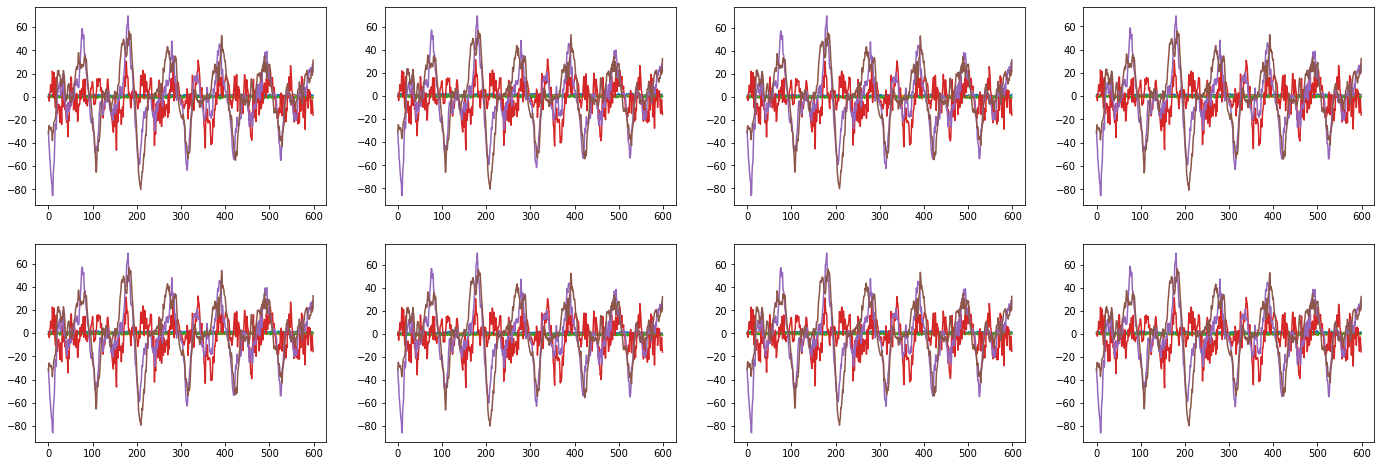

In [ ]:
sigma = 0.5

fig = plt.figure(figsize=(24,8))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(DA_Jitter(temp, sigma))

### Scaling

In [ ]:
def DA_Scaling(X, sigma=0.1):
    scalingFactor = np.random.normal(loc=1.0, scale=sigma, size=(1,X.shape[1])) # shape=(1,3)
    myNoise = np.matmul(np.ones((X.shape[0],1)), scalingFactor)
    return X * myNoise

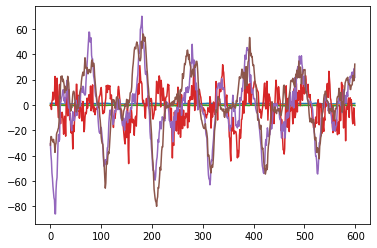

In [ ]:
# 원래 데이터
temp = train.iloc[:600, 2:8].to_numpy()
plt.plot(temp)
plt.show()

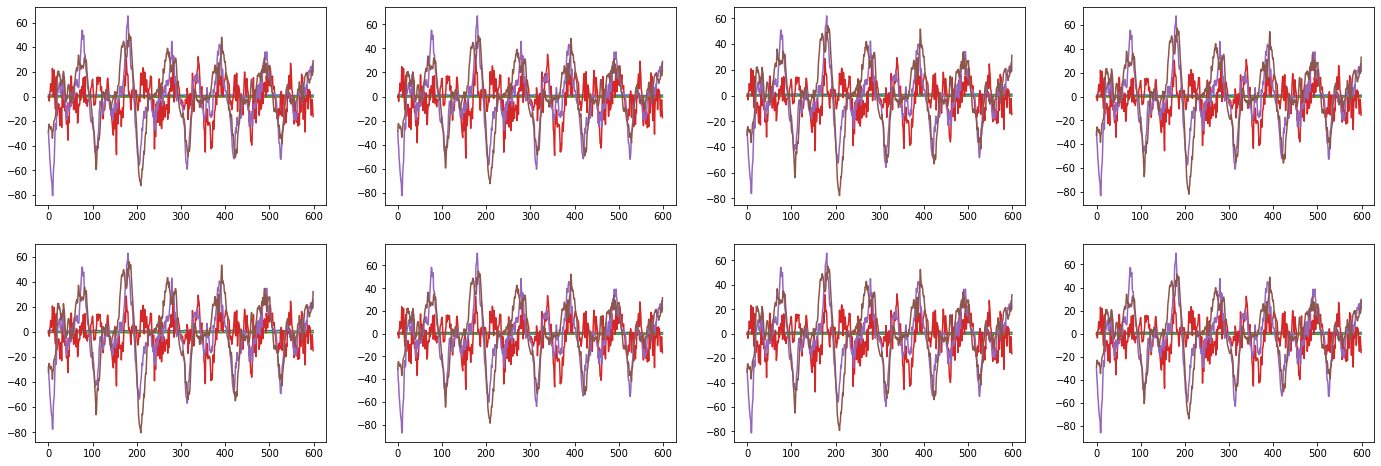

In [ ]:
# Scaling data
sigma = 0.05

fig = plt.figure(figsize=(24,8))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(DA_Scaling(temp, sigma))

### Random Sampling

In [ ]:
def RandSampleTimesteps(X, nSample=600):
    X_new = np.zeros(X.shape)
    tt = np.zeros((nSample,X.shape[1]), dtype=int)
    tt[1:-1,0] = np.sort(np.random.randint(1,X.shape[0]-1,nSample-2))
    tt[1:-1,1] = np.sort(np.random.randint(1,X.shape[0]-1,nSample-2))
    tt[1:-1,2] = np.sort(np.random.randint(1,X.shape[0]-1,nSample-2))
    tt[1:-1,3] = np.sort(np.random.randint(1,X.shape[0]-1,nSample-2))
    tt[1:-1,4] = np.sort(np.random.randint(1,X.shape[0]-1,nSample-2))
    tt[1:-1,5] = np.sort(np.random.randint(1,X.shape[0]-1,nSample-2))
    tt[-1,:] = X.shape[0]-1
    return tt

In [ ]:
def DA_RandSampling(X, nSample=600):
    tt = RandSampleTimesteps(X, nSample)
    X_new = np.zeros(X.shape)
    X_new[:,0] = np.interp(np.arange(X.shape[0]), tt[:,0], X[tt[:,0],0])
    X_new[:,1] = np.interp(np.arange(X.shape[0]), tt[:,1], X[tt[:,1],1])
    X_new[:,2] = np.interp(np.arange(X.shape[0]), tt[:,2], X[tt[:,2],2])
    X_new[:,3] = np.interp(np.arange(X.shape[0]), tt[:,3], X[tt[:,3],3])
    X_new[:,4] = np.interp(np.arange(X.shape[0]), tt[:,4], X[tt[:,4],4])
    X_new[:,5] = np.interp(np.arange(X.shape[0]), tt[:,5], X[tt[:,5],5])
    return X_new

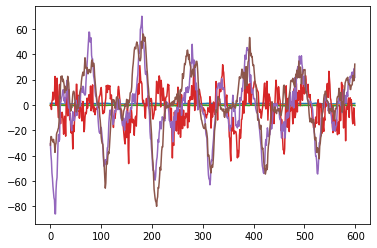

In [ ]:
temp = train.iloc[:600, 2:8].to_numpy()
plt.plot(temp)
plt.show()

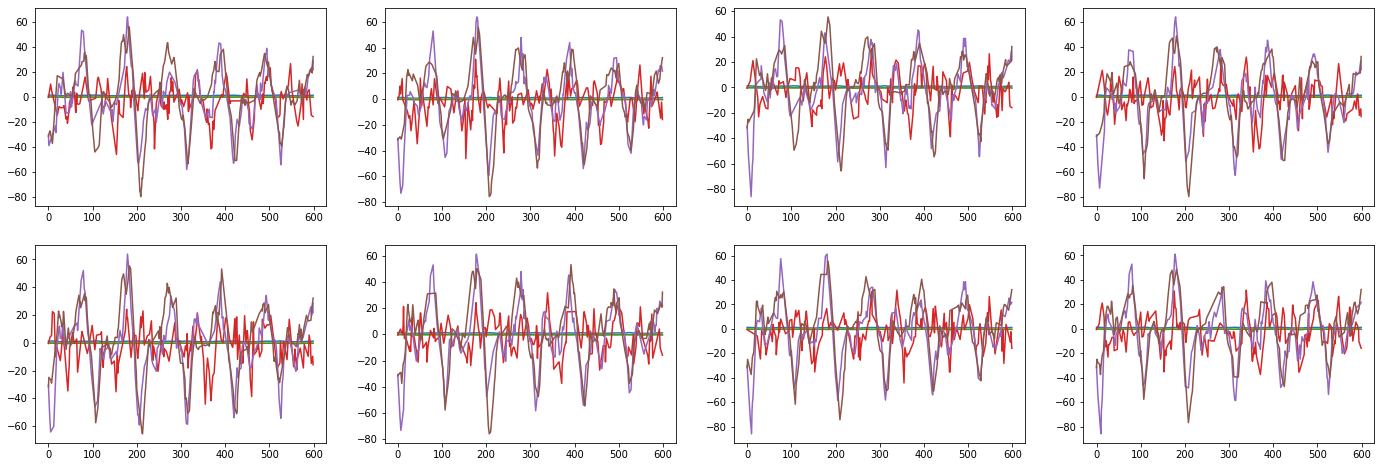

In [ ]:
# 원래 데이터
fig = plt.figure(figsize=(24,8))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(DA_RandSampling(temp, 200))

### Magnitude Warping

In [ ]:
from scipy.interpolate import CubicSpline      # for warping

In [ ]:
sigma = 0.2
knot = 4

In [ ]:
## This example using cubic splice is not the best approach to generate random curves. 
## You can use other aprroaches, e.g., Gaussian process regression, Bezier curve, etc.
def GenerateRandomCurves(X, sigma=0.2, knot=4):
    xx = (np.ones((X.shape[1],1))*(np.arange(0,X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()
    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
    x_range = np.arange(X.shape[0])
    cs_x = CubicSpline(xx[:,0], yy[:,0])
    cs_y = CubicSpline(xx[:,1], yy[:,1])
    cs_z = CubicSpline(xx[:,2], yy[:,2])
    return np.array([cs_x(x_range),cs_y(x_range),cs_z(x_range)]).transpose()

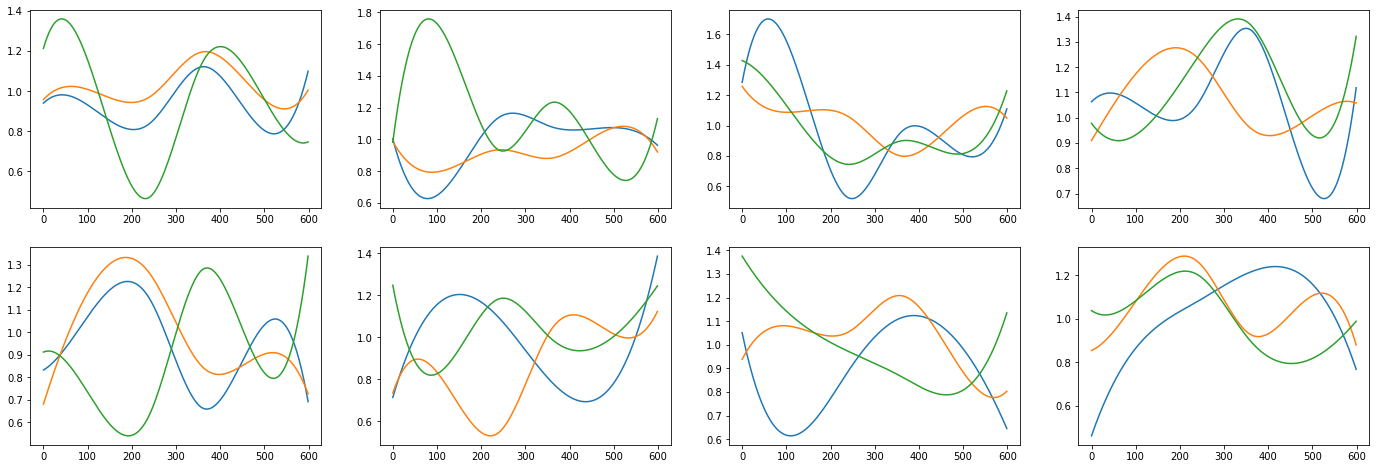

In [ ]:
## Random curves around 1.0
fig = plt.figure(figsize=(24,8))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(GenerateRandomCurves(temp, sigma))

In [ ]:
def DA_MagWarp(X, sigma):
    return X * GenerateRandomCurves(X, sigma)

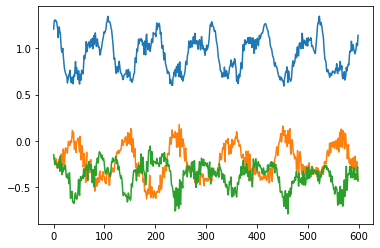

In [ ]:
temp = train.iloc[:600, 2:5].to_numpy()
plt.plot(temp)
plt.show()

In [ ]:
temp.shape

(600, 3)

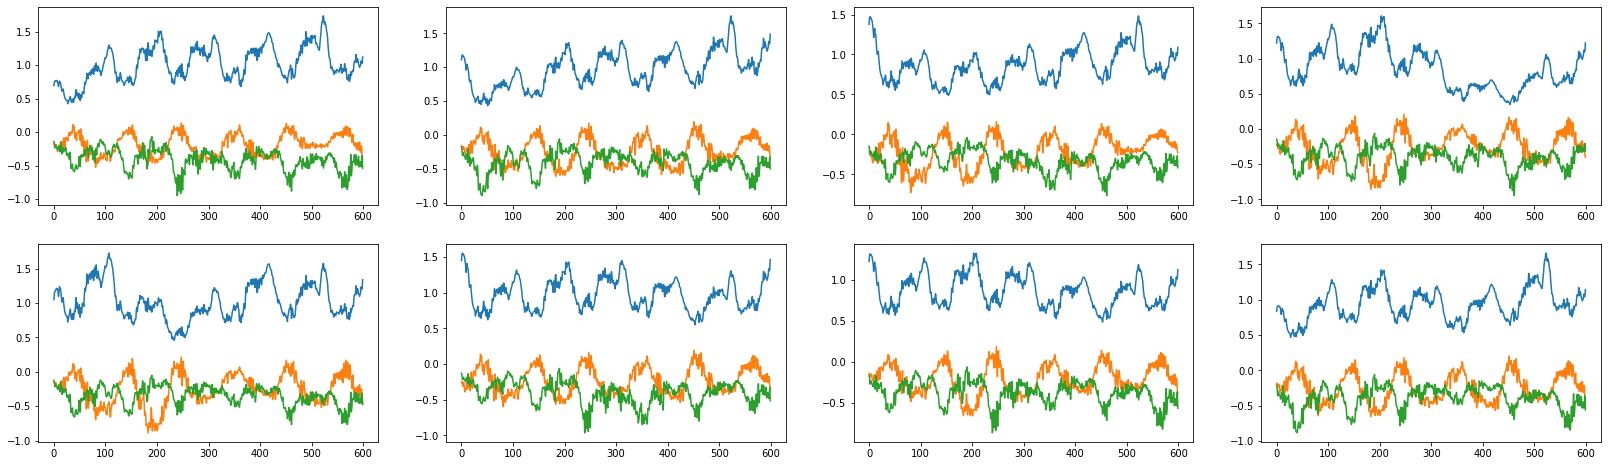

In [ ]:
fig = plt.figure(figsize=(28,8))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(DA_MagWarp(temp, sigma))

### Time Warping

In [ ]:
def DistortTimesteps(X, sigma=0.2):
    tt = GenerateRandomCurves(X, sigma) # Regard these samples aroun 1 as time intervals
    tt_cum = np.cumsum(tt, axis=0)        # Add intervals to make a cumulative graph
    # Make the last value to have X.shape[0]
    t_scale = [(X.shape[0]-1)/tt_cum[-1,0],(X.shape[0]-1)/tt_cum[-1,1],(X.shape[0]-1)/tt_cum[-1,2]]
    tt_cum[:,0] = tt_cum[:,0]*t_scale[0]
    tt_cum[:,1] = tt_cum[:,1]*t_scale[1]
    tt_cum[:,2] = tt_cum[:,2]*t_scale[2]
    return tt_cum

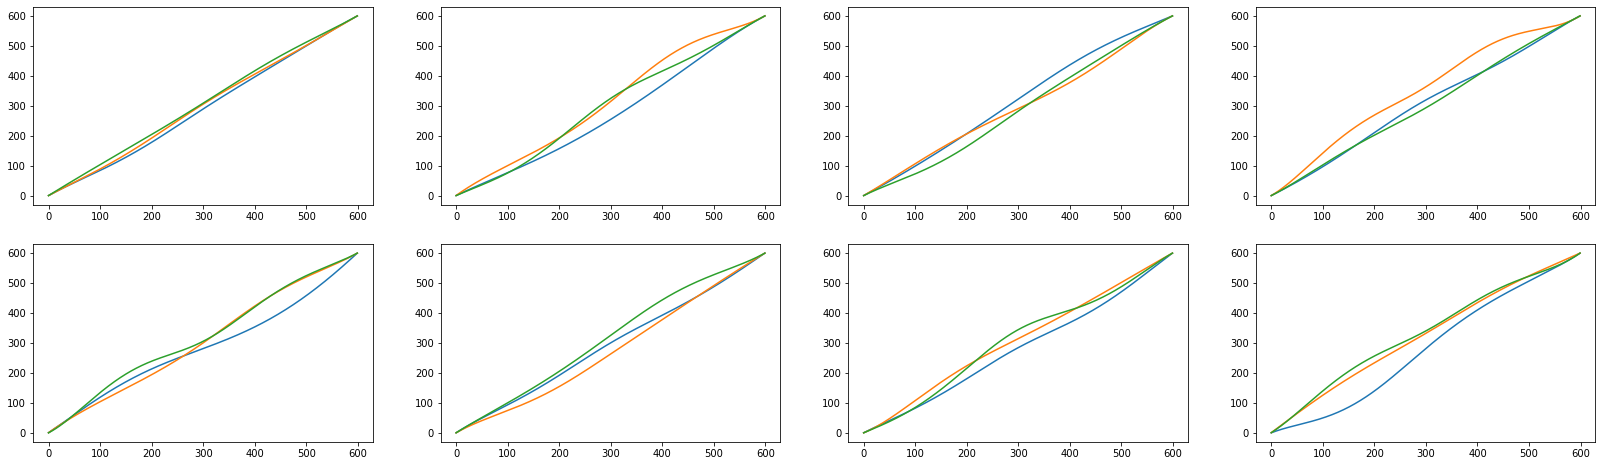

In [ ]:
## Random curves around 1.0
fig = plt.figure(figsize=(28,8))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(DistortTimesteps(temp, sigma))

In [ ]:
def DA_TimeWarp(X, sigma=0.2):
    tt_new = DistortTimesteps(X, sigma)
    X_new = np.zeros(X.shape)
    x_range = np.arange(X.shape[0])
    X_new[:,0] = np.interp(x_range, tt_new[:,0], X[:,0])
    X_new[:,1] = np.interp(x_range, tt_new[:,1], X[:,1])
    X_new[:,2] = np.interp(x_range, tt_new[:,2], X[:,2])
    return X_new

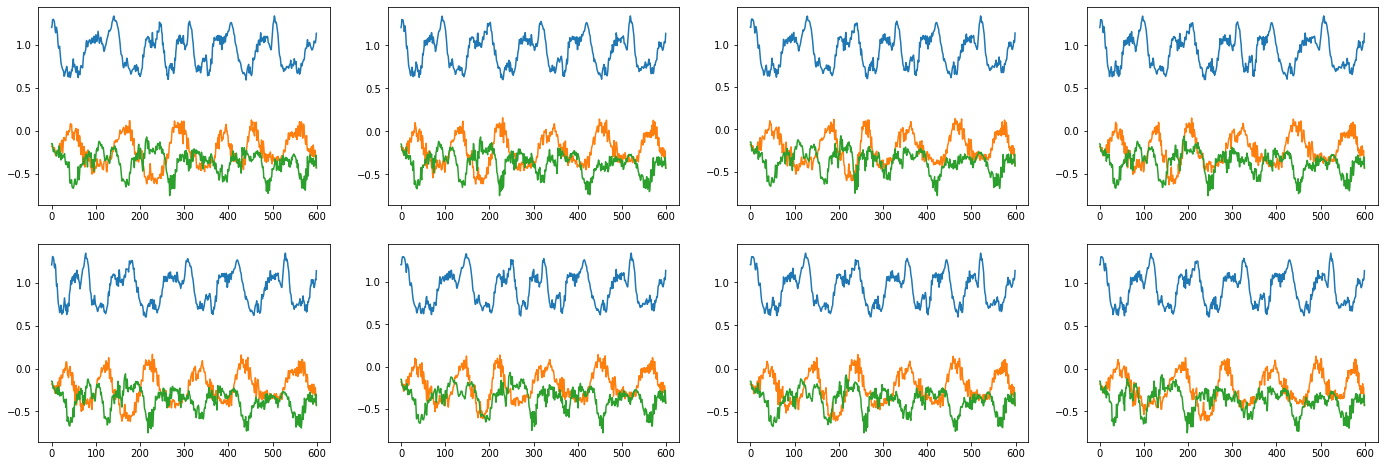

In [ ]:
sigma = 0.2
knot = 4

fig = plt.figure(figsize=(24,8))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(DA_TimeWarp(temp, sigma))

## Data Augmentation 

In [ ]:
# augmentation 데이터 프레임 준비
X_train_augmentation = X_train
X_train_augmentation

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...
1874995,3124,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [ ]:
k = 3125
for j in range(2):
    # Jittering data augmentation
    for i in range(3125):
        if (train_label.iloc[:,1][i] == 26):
            continue
        train_label.iloc[:,1]
        aug = DA_Jitter(X_train[X_train['id'] == i])
        aug['id'] = k

        # X_train_augmentation = pd.concat([X_train[X_train['id'] == i], aug], ignore_index = True)
        X_train_augmentation = pd.concat([X_train_augmentation, aug], ignore_index = True)
        k += 1

    # Scaling data augmentation
    for i in range(3125):
        if (train_label.iloc[:,1][i] == 26):
            continue
        aug = DA_Scaling(X_train[X_train['id'] == i])
        aug['id'] = k

        # X_train_augmentation = pd.concat([X_train[X_train['id'] == i], aug], ignore_index = True)
        X_train_augmentation = pd.concat([X_train_augmentation, aug], ignore_index = True)
        k += 1

    # Random Sampling data augmentation
    for i in range(3125):
        if (train_label.iloc[:,1][i] == 26):
            continue
        aug = pd.DataFrame(DA_RandSampling(X_train[X_train['id'] == i].drop('id', axis = 1).to_numpy()))
        aug.rename(columns = {0:'acc_x', 1:'acc_y', 2:'acc_z', 3:'gy_x', 4:'gy_y', 5:'gy_z'}, inplace = True)
        aug['id'] = k

        # X_train_augmentation = pd.concat([X_train[X_train['id'] == i], aug], ignore_index = True)
        X_train_augmentation = pd.concat([X_train_augmentation, aug], ignore_index = True)
        k += 1

X_train_augmentation

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...
7660195,12766,-0.712530,-0.661448,0.309939,-25.675360,-104.013664,-77.033514
7660196,12766,-0.683037,-0.658466,0.337027,-24.995757,-101.796809,-77.944193
7660197,12766,-0.664730,-0.670515,0.364114,-24.316154,-100.468152,-78.854872
7660198,12766,-0.630534,-0.682565,0.374252,-23.636550,-99.139495,-79.765551


In [ ]:
X_train_augmentation.to_csv('data_augmentation_2x', index=False)

In [ ]:
# augmented data
X_train_augmentation = pd.read_csv('data_augmentation2')
X_train_augmentation

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...
30800995,51334,-0.712530,-0.658357,0.303464,-29.367857,-104.013664,-75.882217
30800996,51334,-0.688630,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
30800997,51334,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
30800998,51334,-0.621541,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [ ]:
X_train

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...
1874995,3124,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [ ]:
train_label.iloc[:,1].head(20)

0     37
1     26
2      3
3     26
4     26
5     26
6     26
7     26
8     26
9     26
10    26
11    26
12    39
13    28
14    26
15    26
16    26
17    26
18    26
19    26
Name: label, dtype: int64

In [ ]:
# Scaling data augmentation
k = 0
for j in range(2):
    for i in range(3):
        if (train_label.iloc[:,1][i] == 26):
            continue
        aug = DA_Scaling(X_train[X_train['id'] == i])
        aug['id'] = k + 3125

        # X_train_aug = pd.concat([X_train[X_train['id'] == i], aug], ignore_index = True)
        X_train_augmentation = pd.concat([X_train_augmentation, aug], ignore_index = True)
        k += 1
X_train_augmentation

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...
1877395,3128,-0.288897,-0.035962,0.899944,21.650133,137.559860,19.384462
1877396,3128,-0.169021,0.118413,1.012551,-4.086162,118.246865,5.711506
1877397,3128,-0.002901,-0.337364,1.050501,-12.852447,123.321082,15.405477
1877398,3128,-0.134877,-0.625839,0.924938,21.764301,132.077238,26.218300


In [ ]:
# Random Sampling data augmentation
for i in range(1):
    aug = pd.DataFrame(DA_RandSampling(X_train[X_train['id'] == i].drop('id', axis = 1).to_numpy()))
    aug.rename(columns = {0:'acc_x', 1:'acc_y', 2:'acc_z', 3:'gy_x', 4:'gy_y', 5:'gy_z'}, inplace = True)
    aug['id'] = i + 3125 + 3125 + 3125

    # X_train_aug = pd.concat([X_train[X_train['id'] == i], aug], ignore_index = True)
    X_train_augmentation = pd.concat([X_train_augmentation, aug], ignore_index = True)

X_train_augmentation

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...
1876795,3127,0.985242,-0.326122,-0.354528,-14.903280,20.172339,22.973018
1876796,3127,1.052837,-0.220710,-0.413472,-10.857025,19.786856,20.952544
1876797,3127,1.025643,-0.289422,-0.354516,-10.283886,25.768654,18.932070
1876798,3127,1.031553,-0.358134,-0.277857,-9.710746,28.697694,25.527539


## 데이터 준비하기

In [ ]:
# 저장된 어그멘테이션 데이터 불러오기
X_train_aug = pd.read_csv('data_augmentation.csv')
X_train_aug

In [ ]:
X_train_aug = X_train_augmentation
X_train_aug

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...
7660195,12766,-0.712530,-0.661448,0.309939,-25.675360,-104.013664,-77.033514
7660196,12766,-0.683037,-0.658466,0.337027,-24.995757,-101.796809,-77.944193
7660197,12766,-0.664730,-0.670515,0.364114,-24.316154,-100.468152,-78.854872
7660198,12766,-0.630534,-0.682565,0.374252,-23.636550,-99.139495,-79.765551


In [ ]:
features = ['id', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z']

X_test = test[features]
X_test

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912
...,...,...,...,...,...,...,...
469195,3906,0.104191,-0.784979,0.639513,-10.475346,14.095361,-190.358982
469196,3906,0.103297,-0.758954,0.615687,-25.360272,-8.523018,-180.393291
469197,3906,0.128294,-0.749389,0.586184,-27.917723,-23.186245,-162.624160
469198,3906,0.104130,-0.692731,0.573397,-27.847980,-30.407555,-138.761676


In [ ]:
# No Augmentation
X_train = X_train.groupby('id').agg(['var', 'sem', 'describe', 'first', 'last', 'sum'])
X_test = X_test.groupby('id').agg(['var', 'sem', 'describe', 'first', 'last', 'sum'])

In [ ]:
# Augmentation
X_train_aug = X_train_aug.groupby('id').agg(['var', 'sem', 'describe', 'first', 'last', 'sum'])
X_test = X_test.groupby('id').agg(['var', 'sem', 'describe', 'first', 'last', 'sum'])

In [ ]:
X_train_aug.to_csv('train_data_group', index=False)
X_test.to_csv('test_data_group', index=False)

In [ ]:
# Augmentation2
X_train_aug = X_train_aug.groupby('id').agg(['max', 'min', 'mean'])
X_test = X_test.groupby('id').agg(['max', 'min', 'mean'])

In [ ]:
# Augmentation3
X_train_aug = X_train_aug.groupby('id').agg(['var', 'sem', 'describe'])
X_test = X_test.groupby('id').agg(['var', 'sem', 'describe'])

In [ ]:
# No Augmentation
X_train

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...
1874995,3124,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [ ]:
# Augmentation
X_train_aug

acc_x                     ...        gy_z                          
            var       sem describe  ...       first        last           sum
          acc_x     acc_x    count  ...        gy_z        gy_z          gy_z
id                                  ...                                      
0      0.036664  0.007817    600.0  ...  -31.676112   32.123007    709.264425
1      0.245548  0.020230    600.0  ...    7.390348  -19.907336    835.976169
2      0.506904  0.029066    600.0  ...  -22.517136   11.845435   1831.974458
3      0.017134  0.005344    600.0  ...  -85.600536  -17.321792  -3521.938833
4      0.245193  0.020215    600.0  ...   12.965565 -270.581913   2672.029417
...         ...       ...      ...  ...         ...         ...           ...
12762  0.198392  0.018184    600.0  ...  -14.223662  -22.632694   1764.548255
12763  0.310058  0.022732    600.0  ...    3.685672  -14.620169   3085.172792
12764  2.068488  0.058715    600.0  ...  -31.389919  180.925423  17545.146207
12765  0.459222  0.027665    600.0  ...  199.711188 -175.861945   -979.204638
12766  0.272386  0.021307    600.0  ...  -64.138319  -80.676229  -1913.339666

[12767 rows x 78 columns]

In [ ]:
X_test

acc_x                     ...        gy_z                         
           var       sem describe  ...       first        last          sum
         acc_x     acc_x    count  ...        gy_z        gy_z         gy_z
id                                 ...                                     
3125  0.055806  0.009644    600.0  ...   13.597668    5.971555 -1200.410049
3126  0.291264  0.022033    600.0  ...  -65.532643   48.491322 -2162.747150
3127  0.048371  0.008979    600.0  ...   -4.451638  -17.718279  -235.904841
3128  0.186376  0.017625    600.0  ...    6.714589    2.914738   -14.590798
3129  0.093512  0.012484    600.0  ...  137.892264   -7.068958  3447.298941
...        ...       ...      ...  ...         ...         ...          ...
3902  0.124330  0.014395    600.0  ... -108.257915  -50.022266  -257.807046
3903  0.440262  0.027088    600.0  ...   92.087589   53.820404  7963.284639
3904  0.063840  0.010315    600.0  ...   85.555965  -10.567302  1161.049596
3905  0.027185  0.006731    600.0  ...   -5.373823   30.654119   559.387949
3906  0.104824  0.013218    600.0  ...  -10.389661 -116.423810 -4318.669726

[782 rows x 78 columns]

In [ ]:
# No Augmentation
X_train.shape, X_test.shape

((1875000, 7), (782, 78))

In [ ]:
# Augmentation
X_train_aug.shape, X_test.shape

((12767, 78), (782, 78))

In [ ]:
X_train_aug = X_train_aug.iloc[:,1:]
X_test = X_test.iloc[:,1:]

X_train_aug.shape, X_test.shape

((7660200, 6), (469200, 6))

In [ ]:
y_train = train_label[['label']]
y_train

,label
0,37
1,26
2,3
3,26
4,26
...,...
3120,26
3121,26
3122,15
3123,26


In [ ]:
# label이 '26'인 데이터만 전부 제거
idx = y_train[y_train['label'] == 26].index
y_train_drop = y_train.drop(idx)
y_train_drop

,label
0,37
2,3
12,39
13,28
20,6
...,...
3117,60
3118,53
3119,17
3122,15


In [ ]:
y_train.count()

label    3125
dtype: int64

In [ ]:
y_train_drop.count()

label    1607
dtype: int64

In [ ]:
y_train_aug = y_train
y_train_aug

,label
0,37
1,26
2,3
3,26
4,26
...,...
3120,26
3121,26
3122,15
3123,26


In [ ]:
# Augmentation

for i in range(2):
    y_train_aug = pd.concat([y_train_aug, y_train_drop], ignore_index=True)
    y_train_aug = pd.concat([y_train_aug, y_train_drop], ignore_index=True)
    y_train_aug = pd.concat([y_train_aug, y_train_drop], ignore_index=True)

print(y_train_aug.shape)

(12767, 1)


In [ ]:
y_train_aug = np.ravel(y_train_aug)
y_train_aug.shape

(12767,)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler() Scaler 객체 생성 without augmentation
sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ValueError: ignored

In [ ]:
# Augmentation : StandardScaler() Scaler 객체 생성
sc = StandardScaler()

sc.fit(X_train_aug)
X_train_std = sc.transform(X_train_aug)
X_test_std = sc.transform(X_test)

In [ ]:
X_train_std.shape, X_test_std.shape

((12767, 78), (782, 78))

# LSTM

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
X=tf.reshape(np.array(X_train_std),[-1, 600, 6])
X.shape

TensorShape([12767, 600, 6])

In [ ]:
y = tf.keras.utils.to_categorical(y_train_aug) 
y.shape

(12767, 61)

In [ ]:
# 가벼운 LSTM 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(600, 6)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
80/80 [==============================] - 4s 29ms/step - loss: 3.7613 - accuracy: 0.1470 - val_loss: 3.1678 - val_accuracy: 0.1108
Epoch 2/100
80/80 [==============================] - 2s 23ms/step - loss: 2.8554 - accuracy: 0.2358 - val_loss: 2.7565 - val_accuracy: 0.2083
Epoch 3/100
80/80 [==============================] - 2s 23ms/step - loss: 2.5158 - accuracy: 0.2963 - val_loss: 2.5245 - val_accuracy: 0.2502
Epoch 4/100
80/80 [==============================] - 2s 25ms/step - loss: 2.3510 - accuracy: 0.3269 - val_loss: 2.2894 - val_accuracy: 0.2944
Epoch 5/100
80/80 [==============================] - 2s 23ms/step - loss: 2.1229 - accuracy: 0.3756 - val_loss: 2.1788 - val_accuracy: 0.3387
Epoch 6/100
80/80 [==============================] - 2s 23ms/step - loss: 2.0393 - accuracy: 0.3954 - val_loss: 1.9495 - val_accuracy: 0.4064
Epoch 7/100
80/80 [==============================] - 2s 23ms/step - loss: 1.8854 - accuracy: 0.4369 - val_loss: 1.9039 - val_accuracy: 0.3939
Epoch 

In [ ]:
test_X=tf.reshape(np.array(X_test_std),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [ ]:
prediction=model.predict(test_X)
prediction

array([[2.50101664e-07, 4.15998855e-33, 2.55748384e-18, ...,
        7.08391741e-02, 9.43471793e-29, 1.04496829e-08],
       [1.38630327e-07, 5.64331960e-29, 3.07125007e-23, ...,
        6.17085605e-25, 5.72484700e-14, 4.59461432e-07],
       [3.27707236e-11, 7.96486835e-11, 4.95938842e-21, ...,
        1.11078396e-37, 1.34276379e-05, 3.25323623e-16],
       ...,
       [3.24833827e-10, 1.15138327e-13, 6.92435779e-12, ...,
        0.00000000e+00, 1.01386259e-08, 4.65340578e-16],
       [1.63017711e-17, 9.12530829e-16, 3.05617973e-21, ...,
        0.00000000e+00, 1.11419695e-05, 6.18908322e-18],
       [4.55042152e-21, 5.80067353e-17, 1.54991220e-08, ...,
        0.00000000e+00, 8.61238563e-21, 1.48021023e-14]], dtype=float32)

In [ ]:
prediction.shape

(782, 61)

In [ ]:
submission.iloc[:,1:]=prediction
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,2.501017e-07,4.159989e-33,2.557484e-18,2.664388e-26,2.560236e-07,9.703556e-27,1.084604e-36,4.507103e-19,3.723021e-17,1.507670e-01,1.496350e-03,3.359371e-04,2.756669e-06,4.544497e-05,2.091718e-03,5.222996e-09,2.631742e-32,3.729201e-34,9.199185e-24,1.917777e-33,3.909146e-15,2.544544e-16,8.312791e-19,7.367140e-08,1.255520e-01,1.455768e-22,2.916772e-01,7.448292e-28,1.794980e-07,6.315068e-12,4.774920e-04,3.566384e-01,4.869410e-08,2.675884e-21,2.637765e-15,1.240781e-27,8.661938e-12,1.066314e-16,1.251453e-09,1.156514e-19,2.069622e-17,2.165938e-30,9.633723e-15,1.069536e-18,4.865015e-21,1.001140e-24,1.612199e-16,3.934273e-18,5.828282e-10,1.036136e-08,9.974290e-10,3.756239e-09,7.580364e-05,6.600457e-13,2.828903e-17,3.460234e-15,5.272349e-21,1.542932e-12,7.083917e-02,9.434718e-29,1.044968e-08
1,3126,1.386303e-07,5.643320e-29,3.071250e-23,1.153837e-15,4.815389e-11,2.985845e-15,0.000000e+00,1.896210e-08,3.215525e-23,3.377209e-08,2.671352e-31,1.087111e-20,1.760730e-26,1.531123e-16,2.813938e-12,1.632948e-06,1.549443e-16,8.629123e-23,1.517803e-12,9.650069e-34,2.067553e-18,9.629915e-12,3.609633e-13,3.013922e-11,2.451200e-14,5.866568e-18,9.999460e-01,1.158747e-28,3.978888e-25,0.000000e+00,6.333054e-15,5.702929e-18,2.436818e-11,2.620730e-18,5.088312e-05,1.556154e-24,1.572708e-13,2.904653e-30,4.053130e-23,2.823902e-15,3.586963e-21,9.951194e-19,3.647120e-21,6.147924e-14,1.202619e-21,2.182998e-13,2.889621e-16,8.264558e-07,9.201286e-10,6.291569e-10,2.882430e-10,1.921671e-20,1.587455e-20,6.537707e-21,8.850412e-32,4.385786e-10,1.310854e-22,3.779565e-10,6.170856e-25,5.724847e-14,4.594614e-07
2,3127,3.277072e-11,7.964868e-11,4.959388e-21,8.456419e-18,0.000000e+00,1.241709e-17,3.850133e-08,2.836433e-14,1.360811e-04,1.165739e-24,5.070226e-35,1.089786e-15,3.190384e-25,4.813678e-24,2.109076e-26,3.496465e-11,1.905382e-13,2.519521e-17,4.277325e-24,2.155111e-31,3.752413e-18,2.580997e-21,7.780833e-31,6.649410e-24,4.166222e-18,7.024573e-08,7.847978e-03,1.509680e-07,2.459258e-19,6.574406e-22,5.991021e-30,0.000000e+00,1.398935e-05,1.649321e-08,4.285378e-16,2.088197e-19,5.989974e-06,1.190697e-08,4.777606e-15,1.155221e-24,1.635288e-07,3.854024e-17,1.240266e-23,1.521177e-15,8.277877e-14,9.093871e-01,4.880368e-32,7.497150e-02,7.623076e-03,6.692936e-10,3.095516e-12,2.726777e-11,4.325934e-22,7.209234e-29,3.939660e-07,2.277498e-12,4.222259e-11,2.193022e-21,1.110784e-37,1.342764e-05,3.253236e-16
3,3128,2.082515e-07,9.292884e-23,8.452943e-08,1.683172e-24,2.793486e-10,2.908683e-23,2.327333e-32,1.315177e-11,1.108733e-04,1.401997e-18,7.627616e-06,1.032398e-08,1.770667e-13,6.998953e-14,4.861213e-03,9.358291e-11,1.892381e-11,1.933132e-17,3.135375e-19,1.906918e-26,2.885163e-18,9.140857e-08,1.773684e-11,1.175097e-05,1.953470e-01,1.801572e-20,1.082126e-01,7.252708e-28,2.877583e-15,6.546476e-14,1.154613e-15,1.106492e-06,5.898461e-06,4.436166e-05,5.796797e-07,1.959709e-22,8.594111e-08,3.175043e-21,6.012716e-06,5.151843e-10,3.435004e-14,5.377819e-22,5.683517e-07,4.151071e-10,4.347211e-20,1.258962e-14,1.216810e-15,7.534936e-17,5.100645e-06,4.755423e-05,1.282316e-04,7.854542e-05,1.535612e-05,8.445860e-14,1.718289e-09,2.138200e-09,3.847293e-18,4.869483e-03,6.862238e-01,5.303947e-21,2.190109e-05
4,3129,3.623230e-08,1.990674e-09,9.966050e-11,8.067553e-07,8.004647e-11,1.120204e-09,0.000000e+00,3.553856e-08,6.915973e-22,8.054919e-17,4.151910e-29,3.512388e-25,1.798050e-32,2.716754e-32,5.884828e-09,6.736554e-05,6.204945e-05,4.398294e-13,1.317535e-04,8.064004e-21,9.961774e-11,2.110881e-08,3.400460e-04,9.794634e-08,5.435683e-22,6.373414e-09,9.976104e-01,1.772798e-37,4.718538e-20,1.108302e-29,2.864228e-15,3.331973e-27,2.020046e-12,7.881669e-04,5.484184e-04,1.896399e-15,1.644987e-07,7.213392e-24,2.988678e-33,4.025511e-26,1.433369e-21,1.510358e-09,9.414543e-11,9.474055e-12,1.960064e-22,1.867994e-09,2.728889e-22,1.771

In [ ]:
submission.to_csv('submission_lstm3.csv', index=False)

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=42, min_samples_leaf=10)

In [ ]:
model.fit(X_train_std, y_train)

ValueError: ignored

In [ ]:
# Augmentation
model.fit(X_train_std, y_train_aug)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

predicted = model.predict(X_train_std)
accuracy = accuracy_score(y_train_aug, predicted)

print(f'Mean accuracy score: {accuracy:.5}')

Mean accuracy score: 0.98567


In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0) 
results = cross_val_score(model, X_train_std, y_train_aug, cv=5)

print(results.mean())
results

0.9598962143512892


array([0.97650744, 0.94831637, 0.96357227, 0.95299647, 0.95808852])

# LogLoss

In [ ]:
from sklearn.metrics import log_loss

predict = model.predict(X)
score = log_loss(y, predict)
score

NameError: ignored

In [ ]:
from sklearn.metrics import log_loss

predict = model.predict_proba(X_train_std)
score = log_loss(y_train_aug, predict)
score

0.4115120315730566

In [ ]:
y_pred = model.predict_proba(X_test_std)
y_pred

array([[0.0014739 , 0.        , 0.0075    , ..., 0.06893119, 0.        ,
        0.01639751],
       [0.01090732, 0.        , 0.        , ..., 0.00111111, 0.        ,
        0.00208333],
       [0.01079762, 0.17097327, 0.0004    , ..., 0.        , 0.05600583,
        0.00521429],
       ...,
       [0.00185185, 0.        , 0.        , ..., 0.        , 0.        ,
        0.0012    ],
       [0.        , 0.00333333, 0.        , ..., 0.        , 0.00428571,
        0.        ],
       [0.00491941, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00872657]])

In [ ]:
y_pred.shape

(782, 61)

In [ ]:
submission.iloc[:,1:] = y_pred
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0.001474,0.000000,0.0075,0.016747,0.000000,0.000000,0.001818,0.000000,0.000000,0.078888,0.223546,0.109081,0.0,0.096807,0.053521,0.002188,0.001818,0.000000,0.000000,0.000000,0.000000,0.001323,0.000000,0.000909,0.110670,0.000000,0.022893,0.000000,0.000000,0.000000,0.016682,0.009060,0.001524,0.000000,0.007169,0.000667,0.117505,0.000000,0.000000,0.00000,0.000000,0.000000,0.021580,0.000000,0.002222,0.000000,0.000000,0.000000,0.000000,0.001765,0.002105,0.003568,0.0,0.000000,0.000000,0.000000,0.000000,0.001645,0.068931,0.000000,0.016398
1,3126,0.010907,0.000000,0.0000,0.002224,0.024741,0.003741,0.000000,0.001250,0.000000,0.006062,0.016283,0.013191,0.0,0.000000,0.002222,0.000000,0.005739,0.000000,0.000714,0.000000,0.000714,0.021046,0.008176,0.015190,0.000000,0.000000,0.770370,0.000000,0.000000,0.000000,0.001312,0.003365,0.001484,0.000667,0.009953,0.000000,0.004906,0.000000,0.002853,0.00000,0.006364,0.000000,0.008465,0.000000,0.000000,0.000000,0.000800,0.004286,0.002609,0.024470,0.018625,0.000000,0.0,0.001429,0.000000,0.001538,0.000000,0.001111,0.001111,0.000000,0.002083
2,3127,0.010798,0.170973,0.0004,0.000000,0.000000,0.000000,0.026578,0.009188,0.008000,0.000417,0.003684,0.000000,0.0,0.000000,0.005263,0.005658,0.006333,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032916,0.035069,0.009696,0.018161,0.000000,0.000000,0.015231,0.007946,0.015909,0.000000,0.033866,0.026497,0.003870,0.00125,0.015901,0.000000,0.021744,0.023183,0.012687,0.259643,0.000000,0.017567,0.049333,0.043926,0.000000,0.000000,0.0,0.000000,0.015044,0.000000,0.027048,0.000000,0.000000,0.056006,0.005214
3,3128,0.006919,0.001186,0.0000,0.000956,0.000000,0.000435,0.000000,0.016158,0.001429,0.001514,0.001083,0.003810,0.0,0.000952,0.000000,0.000000,0.002579,0.000000,0.000000,0.000000,0.000000,0.012017,0.008824,0.007711,0.002078,0.000000,0.802722,0.000000,0.003182,0.000000,0.000000,0.001204,0.007340,0.006935,0.016230,0.000000,0.000476,0.000000,0.000000,0.00000,0.000000,0.006966,0.007434,0.006032,0.000833,0.000000,0.000000,0.000000,0.009385,0.014895,0.022408,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.006642,0.000000,0.000000,0.019666
4,3129,0.061938,0.000000,0.0000,0.005370,0.042289,0.002881,0.000000,0.000889,0.003571,0.001053,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.002667,0.000000,0.000000,0.000000,0.002143,0.000000,0.043567,0.000455,0.000000,0.000833,0.687850,0.000000,0.000000,0.000000,0.000000,0.001611,0.002480,0.004865,0.006091,0.000000,0.000909,0.000000,0.000000,0.00000,0.000000,0.003234,0.002916,0.000000,0.000000,0.000000,0.002778,0.000000,0.000000,0.013184,0.100389,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.006037,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.028211,0.000000,0.0000,0.001053,0.283904,0.001204,0.000000,0.005765,0.000000,0.012413,0.003750,0.010064,0.0,0.002812,0.000476,0.004832,0.000000,0.000000,0.003942,0.000000,0.001667,0.000588,0.044706,0.002000,0.000000,0.002888,0.462541,0.000000,0.000000,0.000000,0.005535,0.000667,0.031036,0.001222,0.014416,0.000000,0.003750,0.000000,0.009928,0.00000,0.007168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012202,0.023844,0.003913,0.0,0.006087,0.000000,0.000000,0.000000,0.007415,0.000000,0.000000,0.000000
778,3903,0.032173,0.000000,0.0005,0.013929,0.031463,0.010000,0.000000,0.006404,0.000000,0.002727,0.009427,0.007238,0.0,0.000000,0.000000,0.019077,0.016383,0.000000,0.078203,0.000455,0.028307,0.004502,0.037758,0.037771,0.000000,0.000769,0.448523,0.000000,0.000000,0.000000,0.000000,0.000000,0.004359,0.003818,0.0

In [ ]:
submission.iloc[:,1:].max(axis = 1).sum()/782

0.5508982405619646

In [ ]:
submission.to_csv('submission_rf39.csv', index=False)